Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

brand_name: Name of manufacturing brand
os: OS on which the device runs
screen_size: Size of the screen in cm
4g: Whether 4G is available or not
5g: Whether 5G is available or not
main_camera_mp: Resolution of the rear camera in megapixels
selfie_camera_mp: Resolution of the front camera in megapixels
int_memory: Amount of internal memory (ROM) in GB
ram: Amount of RAM in GB
battery: Energy capacity of the device battery in mAh
weight: Weight of the device in grams
release_year: Year when the device model was released
days_used: Number of days the used/refurbished device has been used
normalized_new_price: Normalized price of a new device of the same model in euros
normalized_used_price: Normalized price of the used/refurbished device in euros

We are going to import all the necessary libraries. 

In [11]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

We are going to import the data:

In [13]:
data = pd.read_csv("C:\\users\\moham\\Downloads\\Great Learning\\Linear Regression Wk 2\\used_device_data.csv") ## Complete the code to read the data

Data Overview

The initial steps to get an overview of any dataset is to:

observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
get information about the number of rows and columns in the dataset
find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
check the statistical summary of the dataset to get an overview of the numerical columns of the data

Displaying the first and last few rows of the dataset

In [17]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [18]:
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


Observation: We can see that some data is missing.

I came up with a new code to look at the five rows from the midpoint in the data to see if there is anything missing there too. 

In [21]:
# Assume your DataFrame is called df
mid_index = len(data) // 2  # Find the midpoint index

# Slice five rows centered around the midpoint
df_mid_five = data.iloc[mid_index - 2 : mid_index + 3]

print(df_mid_five)

     brand_name       os  screen_size   4g  5g  main_camera_mp  \
1725         LG  Android        10.16   no  no            3.15   
1726         LG  Android         7.67   no  no            2.00   
1727         LG  Android        12.88  yes  no            8.00   
1728         LG  Android        12.83  yes  no           13.00   
1729         LG  Android        12.70   no  no            8.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
1725               0.3        16.0  4.0   1900.0  142.00          2014   
1726               1.3        16.0  4.0   1540.0  140.45          2014   
1727               1.3        32.0  4.0   3200.0  168.10          2014   
1728               2.1        32.0  4.0   3000.0  154.00          2014   
1729               1.3        32.0  4.0   2540.0  140.45          2014   

      days_used  normalized_used_price  normalized_new_price  
1725        715               3.270709              4.624384  
1726        952               3.

There is nothing missing there though. However, there is at least one row of missing data. We will delve into it down the line.

Let's look at the shape of the data to see how many rows and columns we are dealing with. 

In [24]:
data.shape

(3454, 15)

Now, let's look at the information and description of the data. 

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

So, we can see that there are for categorical columns as well as 11 numerical ones. 

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


Observations:
1- Ram has the same minimum, median and maximum values. 
2- The number of rows across different columns are not the same. This indicates there is some data missing.


Now, let's see if there are any duplicates and missing values.

In [31]:
data.duplicated().sum()

0

In [32]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observations:
1-There are no duplicates.
2-main_camera_mp, selfie_camera_mp, int_memory, ram, batter, and wight columns have missing data.

Now, we make a copy of the dataset to avoid any changes being implemented to the raw data. 

In [35]:
df= data.copy()

Now, it is time to carry out exploratory data analysis. We are going to define histogram_boxplot as well as a labeled bar plot.

In [37]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [38]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Now, we are going to create visuals for all numerical columns against their counts. 

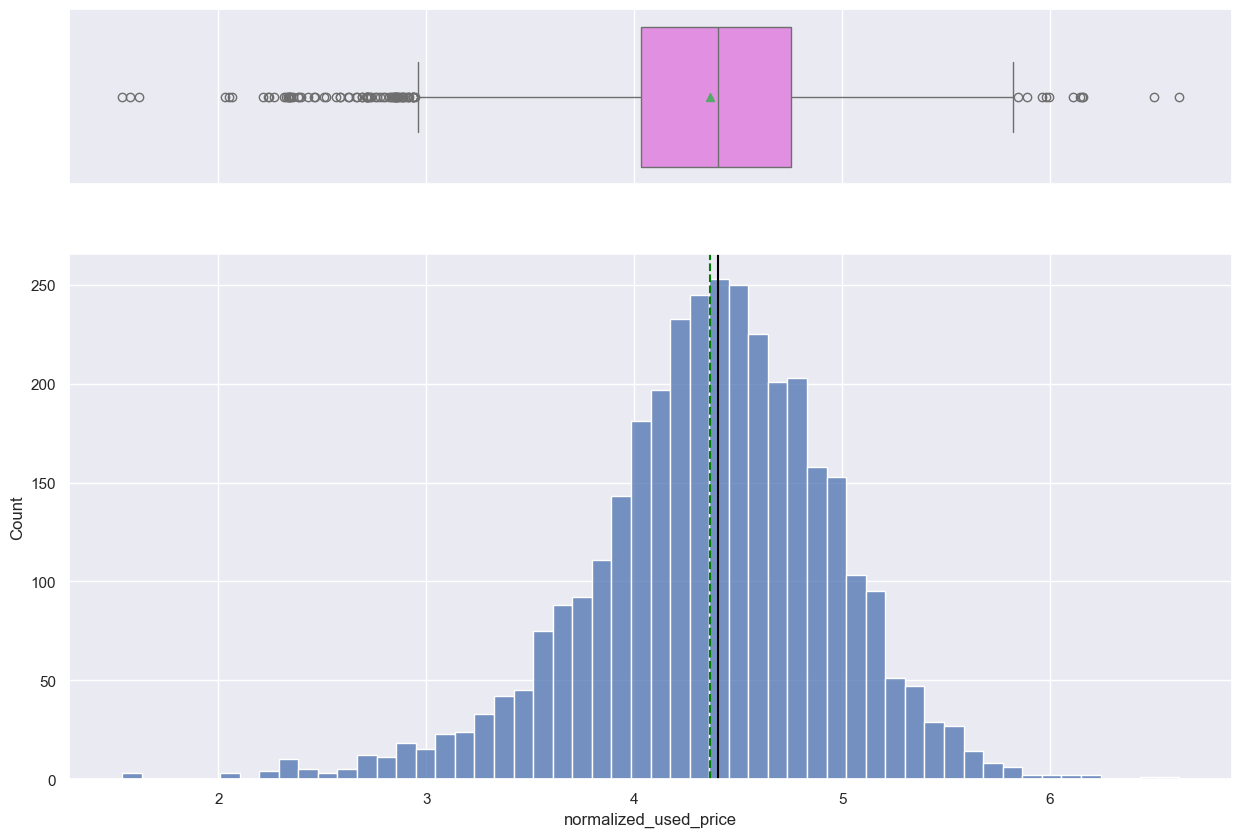

In [40]:
histogram_boxplot(df, "normalized_used_price")

The above chart indicate that there is almost NORMAL DISTRIBUTION for normalized used price and its count. 
I indicate it as "almost" because there is a bit of right skewedness here in the barplot.

The boxplot indicate that there is a lot of outliers on the left side, but not as much on the right side. 
Mean seem to be slightly lower than median.

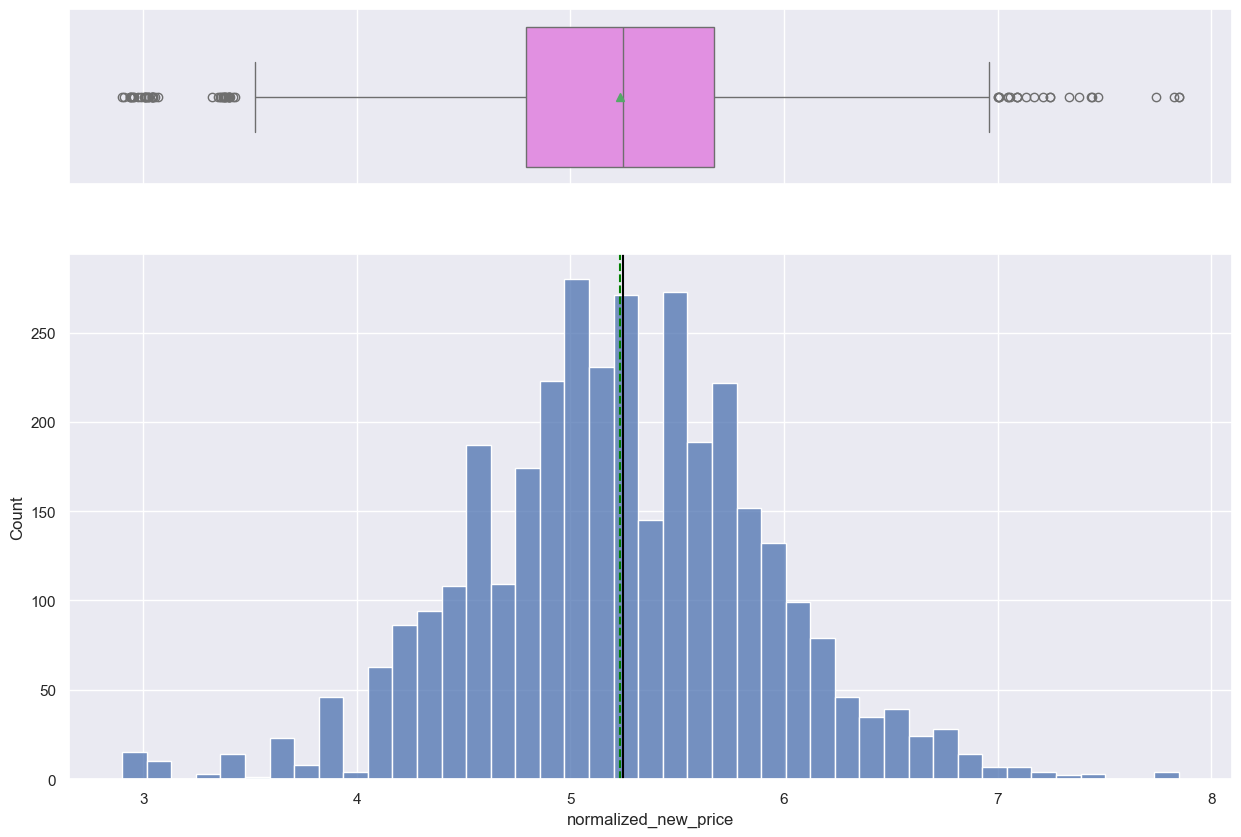

In [42]:
histogram_boxplot(df, 'normalized_new_price')

The above histogram shows there is no normal distribution. 
Median and mean seem to be almost the same as each other though. 
There are outliers on both ends of the data. They are spread out on the upper end while they are centered towards a couple of values on the lower end of the data.

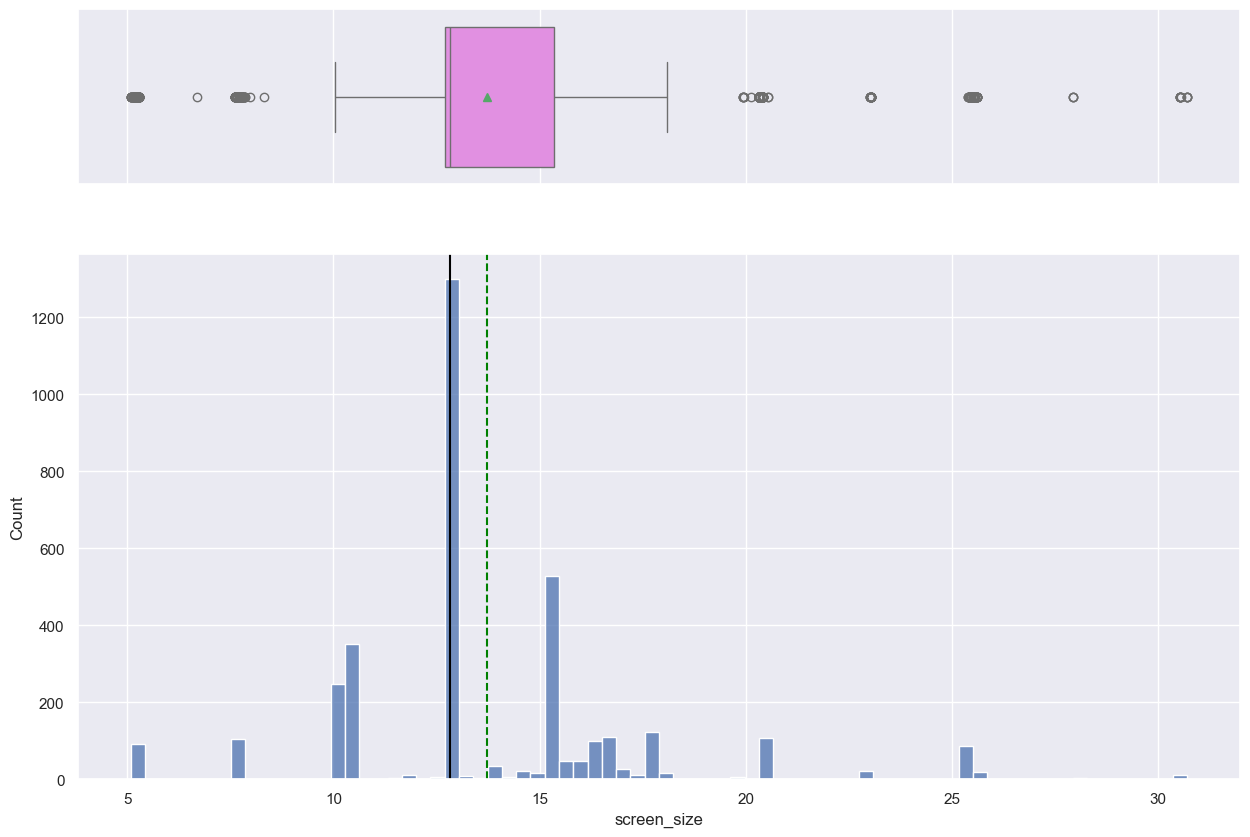

In [44]:
histogram_boxplot(df, 'screen_size')

There is certainly no normality of any kind in the above visuals. 
Mean seems to be quite a bit higher than median. 
Outliers are spread out on both ends of the data.

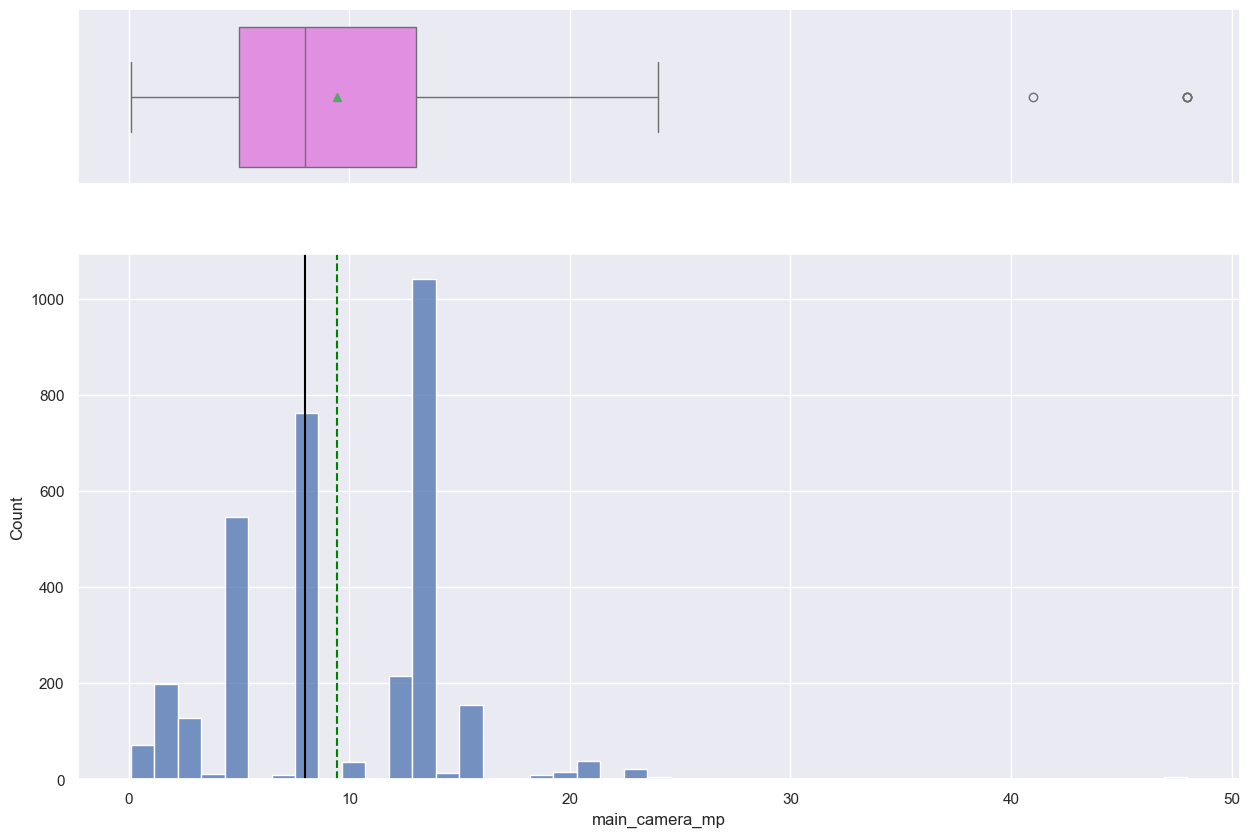

In [46]:
histogram_boxplot(df, 'main_camera_mp')

There is certainly no normality of any kind the above visuals. 
Mean seems to be quite a bit higher than median. 
And, there are no outliers. 

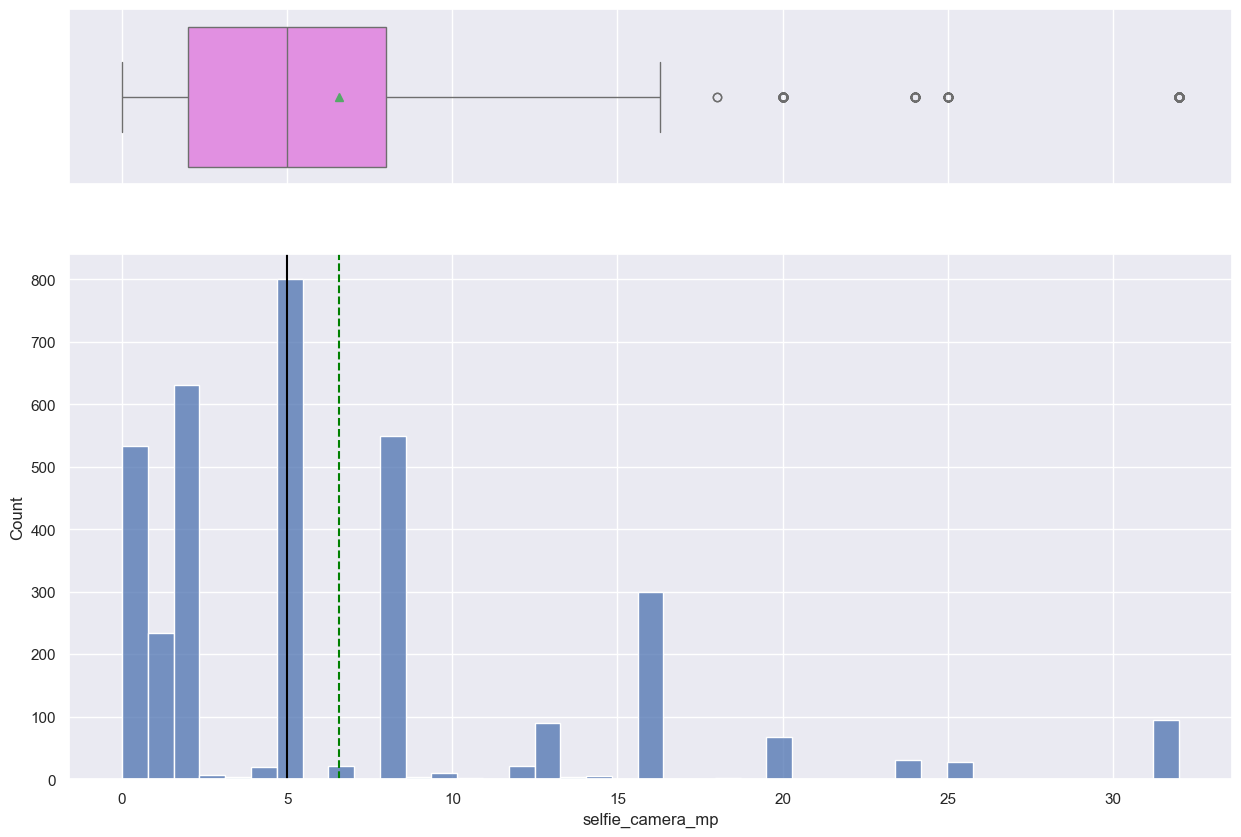

In [48]:
histogram_boxplot(df, 'selfie_camera_mp')

There is certainly no normality of any kind in the above visuals. 
Mean seems to be quite a bit higher than median. 
Outliers seem to be more on the upper side of the data.

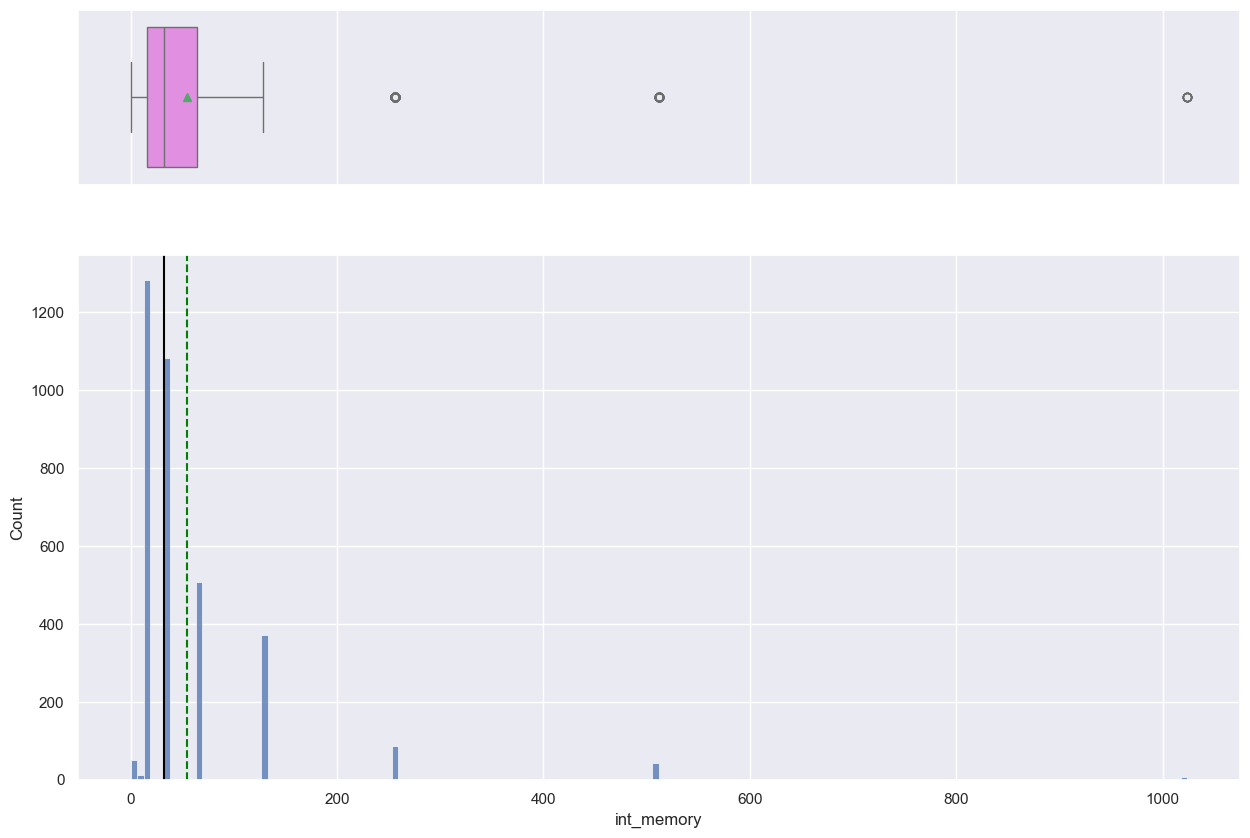

In [50]:
histogram_boxplot(df, 'int_memory')

There is certainly no normality of any kind in the above visuals. 
Mean seems to be quite a bit higher than median. 
Outliers seem to be more on the upper side of the data.

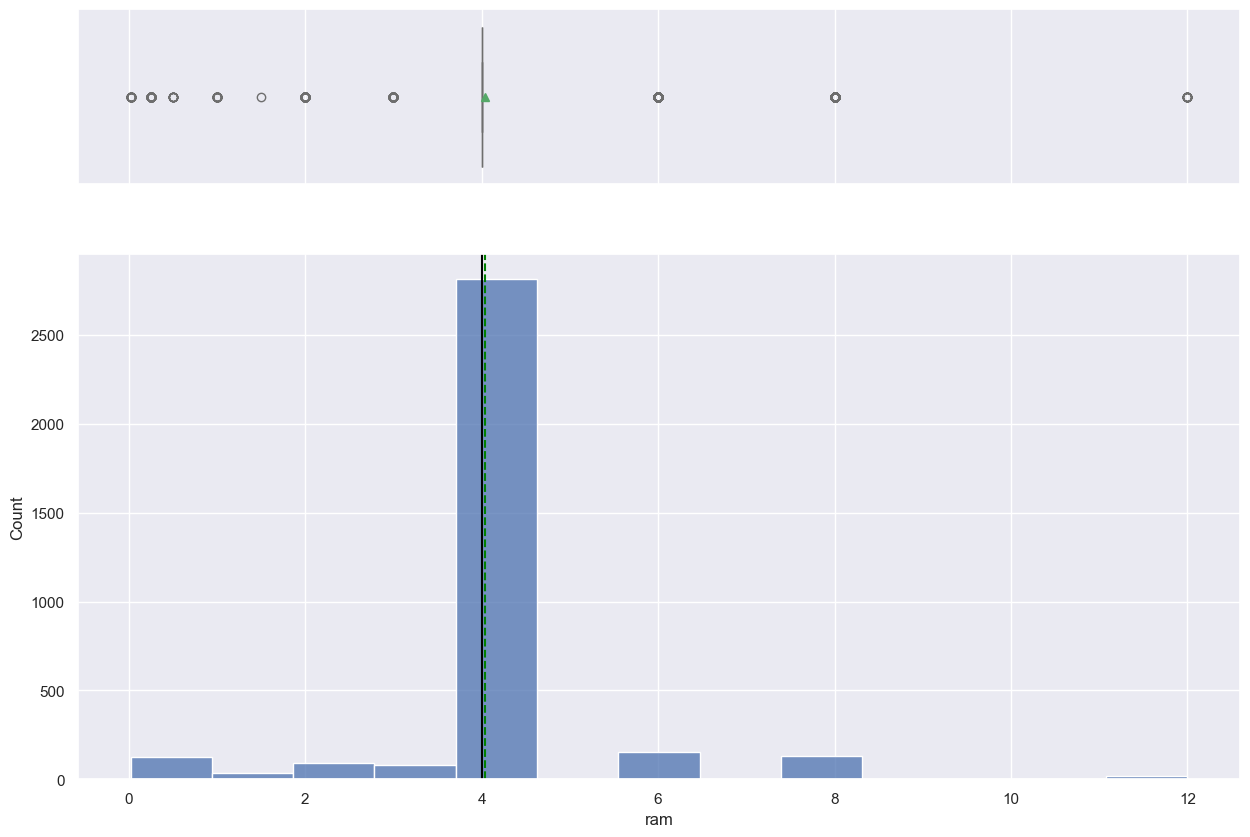

In [52]:
histogram_boxplot(df, 'ram')

There is certainly no normality of any kind the above visuals. 
Mean and median are very similar to each other. 
There are outliers on both ends of the data. 

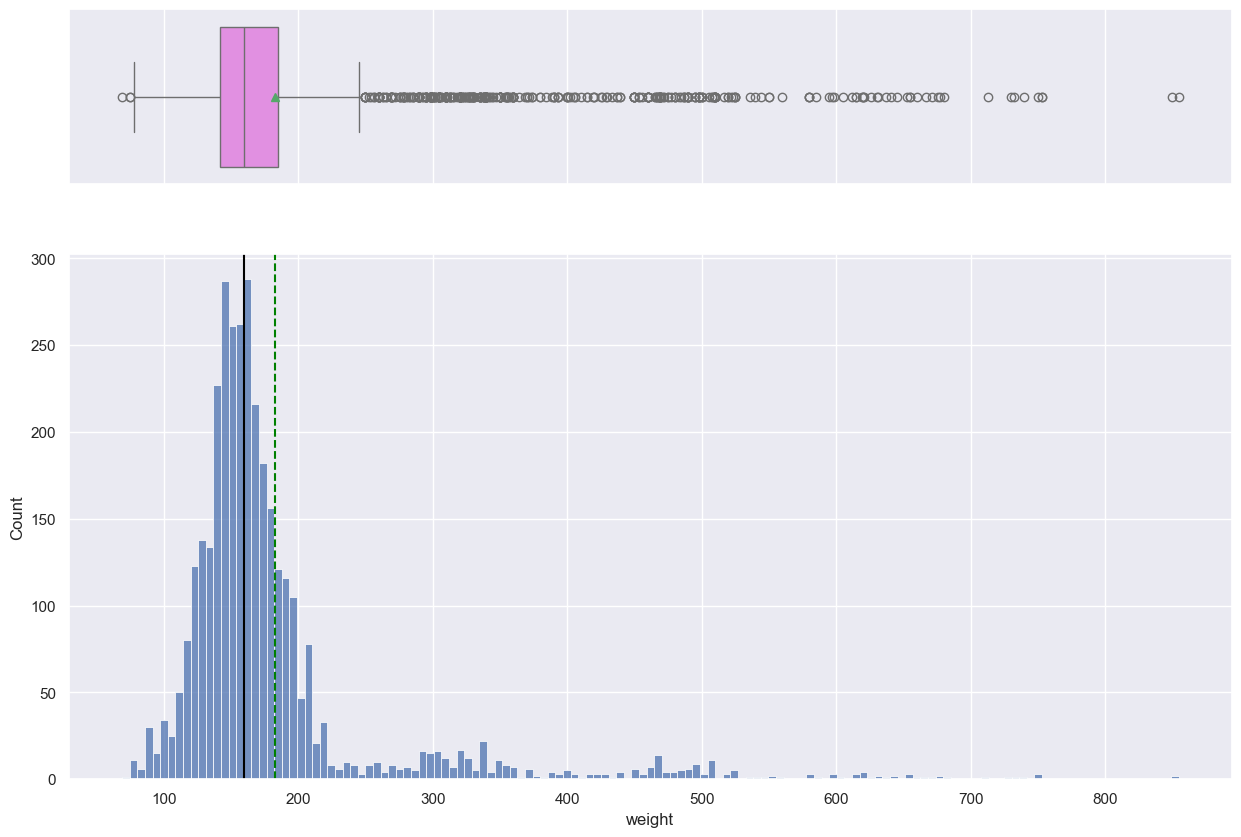

In [54]:
histogram_boxplot(df, 'weight')

There is certainly no normality of any kind in the above visuals even though it might seem like it.
Mean is faily higher than median. 
There are outliers on the right side of the data. It makes it to be slightly right skewed. 

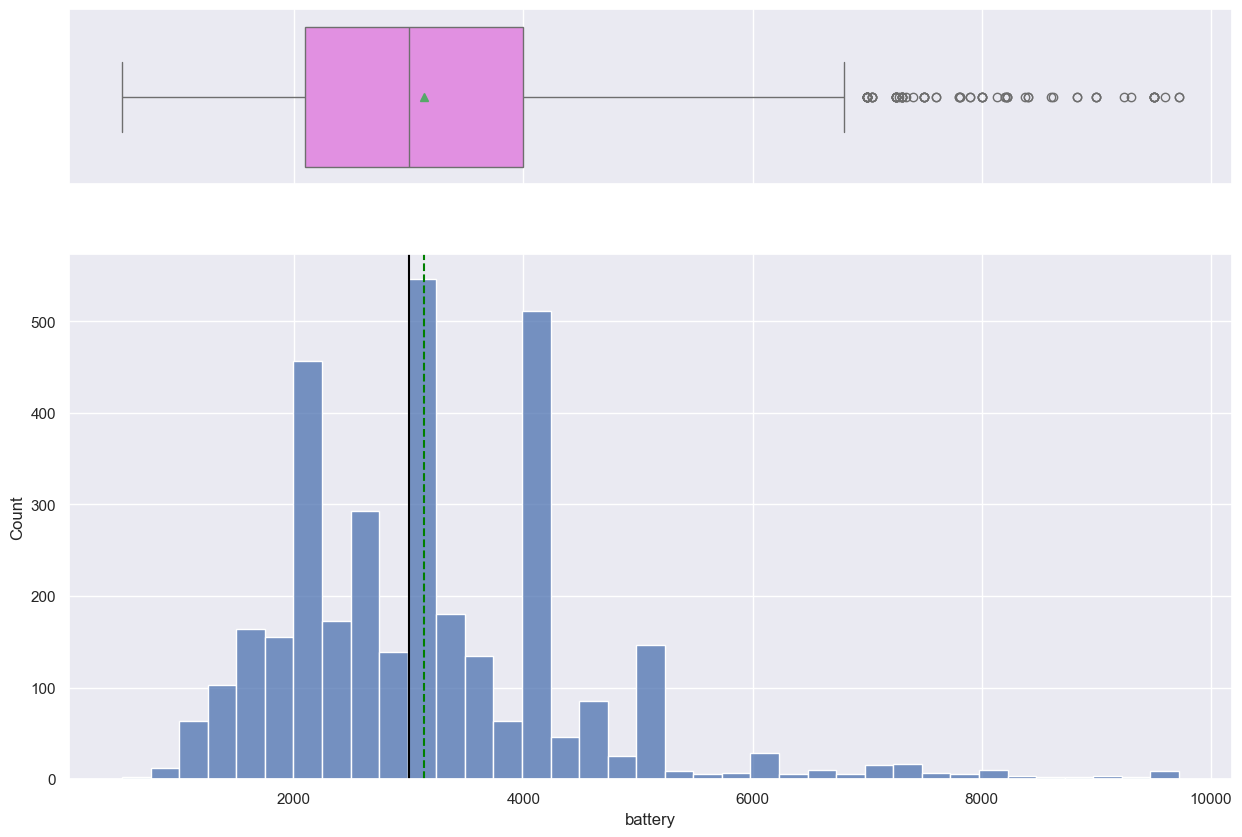

In [56]:
histogram_boxplot(df, 'battery') 

There is certainly no normality of any kind in the above visuals even though it might seem like it.
Mean is faily higher than median. 
And, there are a lot of outliers on the upper side of the data. 

There is really no normality in the above histogram. It shows there is irregularity. 
The box plot indicates there is no visible outliers and that median and mean are fairly close to each other. 

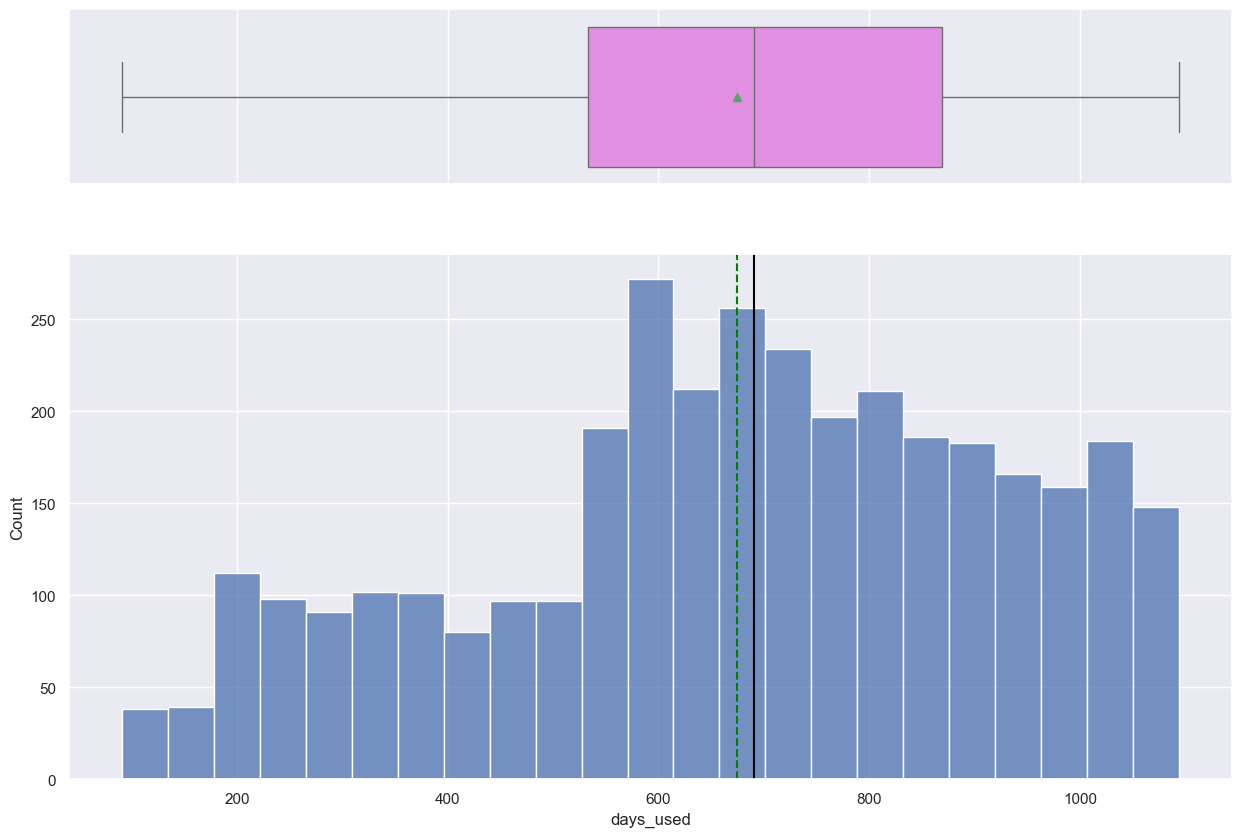

In [59]:
histogram_boxplot(df, 'days_used') 

There is no normality in the above histogram. It actually shows there is a lot of irregularity. 
There doesn't seem to be any outliers on either sides of the data.
Mean and median seem to be fairly close to each other. 

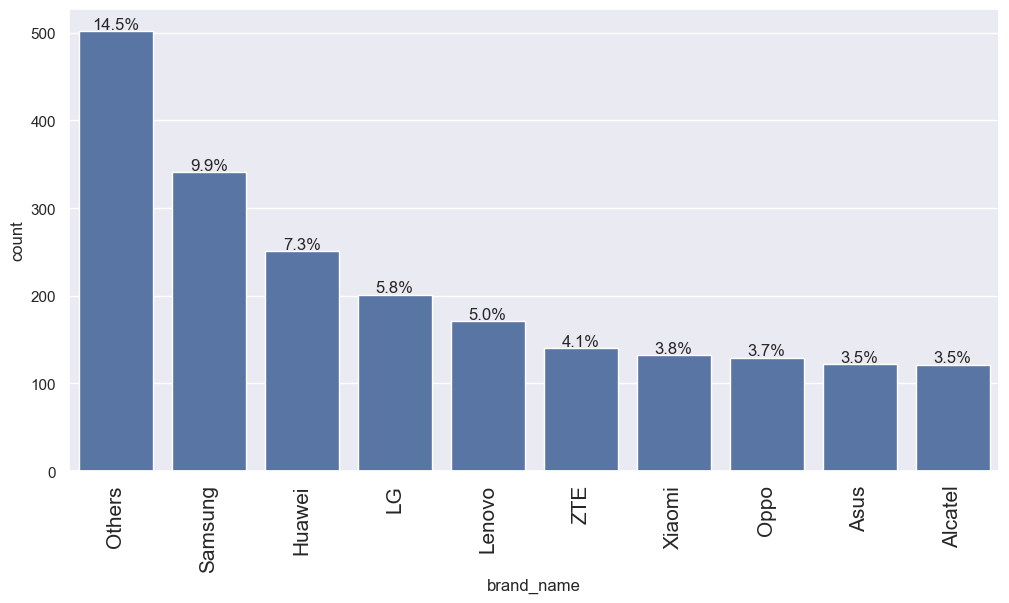

In [61]:
labeled_barplot(df, "brand_name", perc=True, n=10)

The above bar chart shows that Alcatel is the least popular brand while Samsung and "other" brands come as second and first in popularity. 

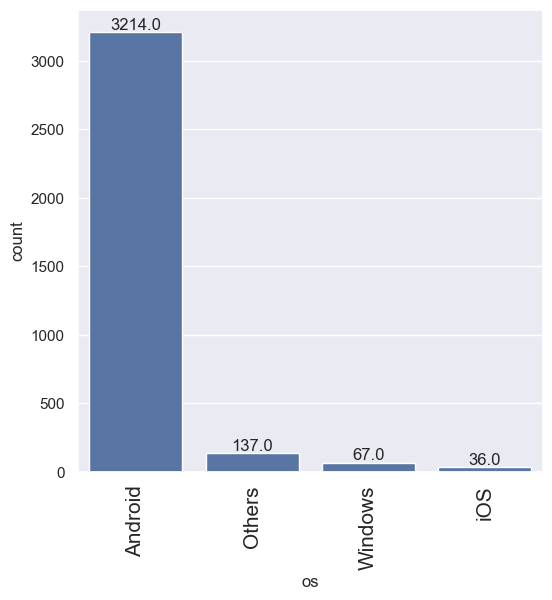

In [63]:
labeled_barplot(df, 'os')

Android takes the first place while iOS takes the last place among popularity of phone systems. 

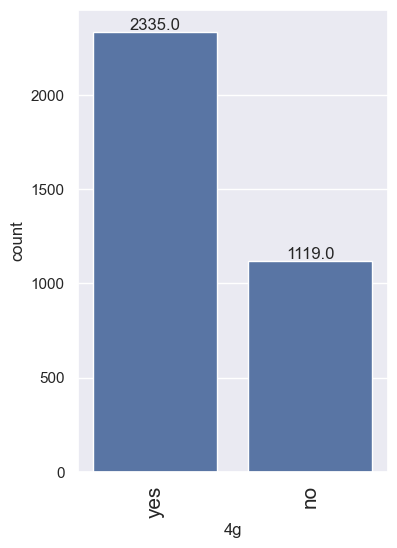

In [65]:
labeled_barplot(df, '4g')

Products with 4 Gigabyte specification are twice as popular as those products without 4G. 

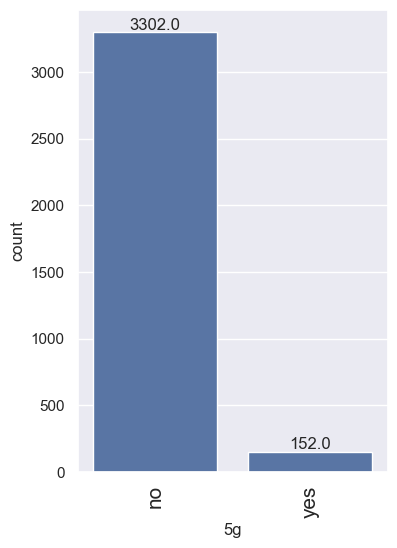

In [67]:
labeled_barplot(df, '5g')

Interestingly, products with 5G are not that popular. 

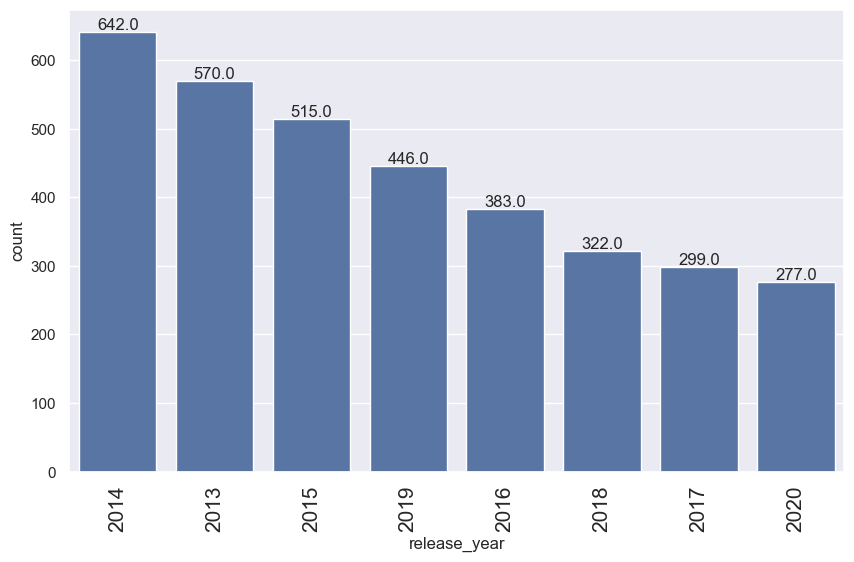

In [69]:
labeled_barplot(df, 'release_year')

There is a lot of demand for products released in 2014 than even 2020. 

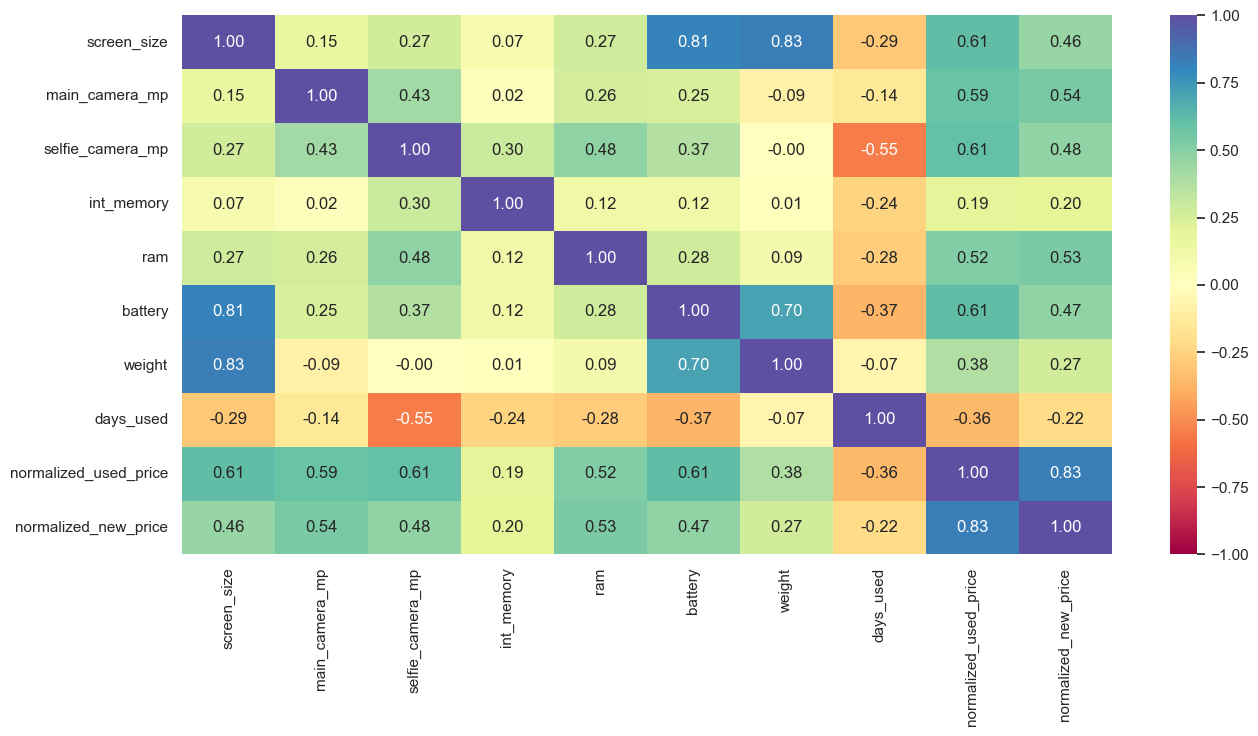

In [71]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## There is a high correlation between:
### Normalized new price vs normalized used price items
### The weight of the phone and its battery
### There is a negative correlation between selfi camera mp and number of days used. 


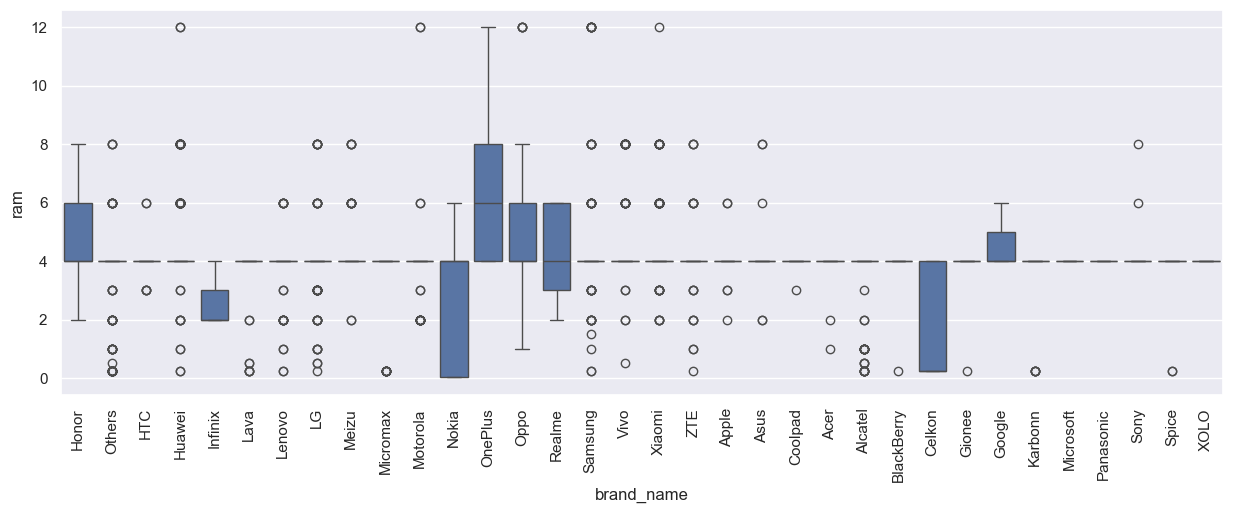

In [73]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

The median of ram is almost the same among all brands except Nokia, OnePlus, Oppo, Realme, Celkon, Google, Infinix and Honor. 

People who travel frequently require devices with large batteries to run through the day. 
But large battery often increases weight, making it feel uncomfortable in the hands. 
Let's create a new dataframe of only those devices which offer a large battery and analyze.

In [76]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

This tells us that there 341 rows of data and 15 columns for products with specification battery of 4500.

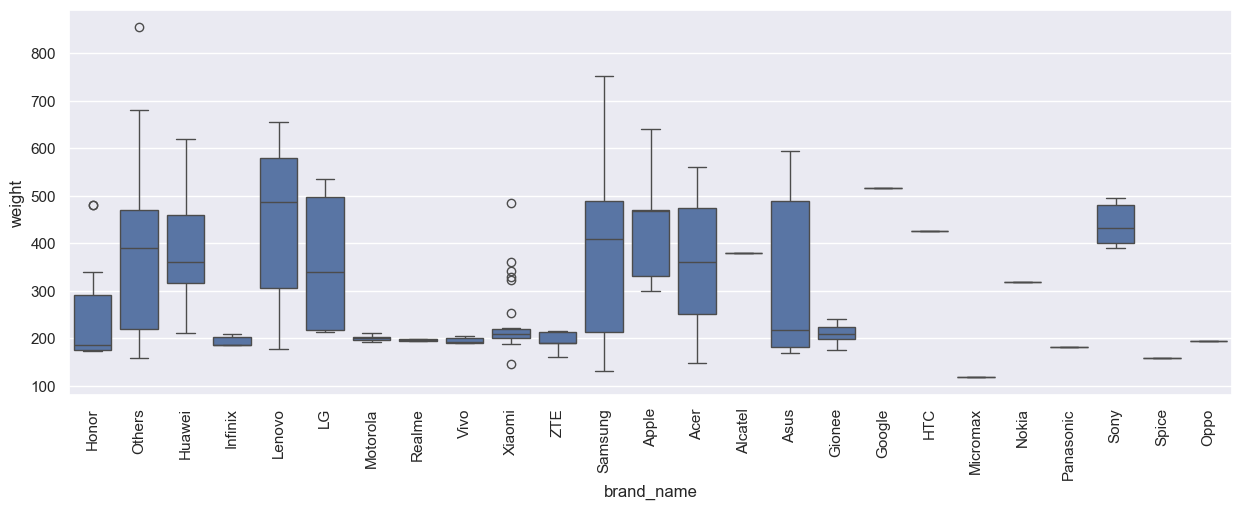

In [78]:
plt.figure(figsize=(15, 5))
sns.boxplot(df_large_battery, x='brand_name', y='weight') 
plt.xticks(rotation=90)
plt.show()

This tells us that there is no relationship between the weight of the product and brands for the most part. 

People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience.
Let's create a new dataframe of only those devices which are suitable for such people and analyze.

In [81]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

This tells us that there 1099 rows of data with 15 columns for products with screen size greater than 6. 

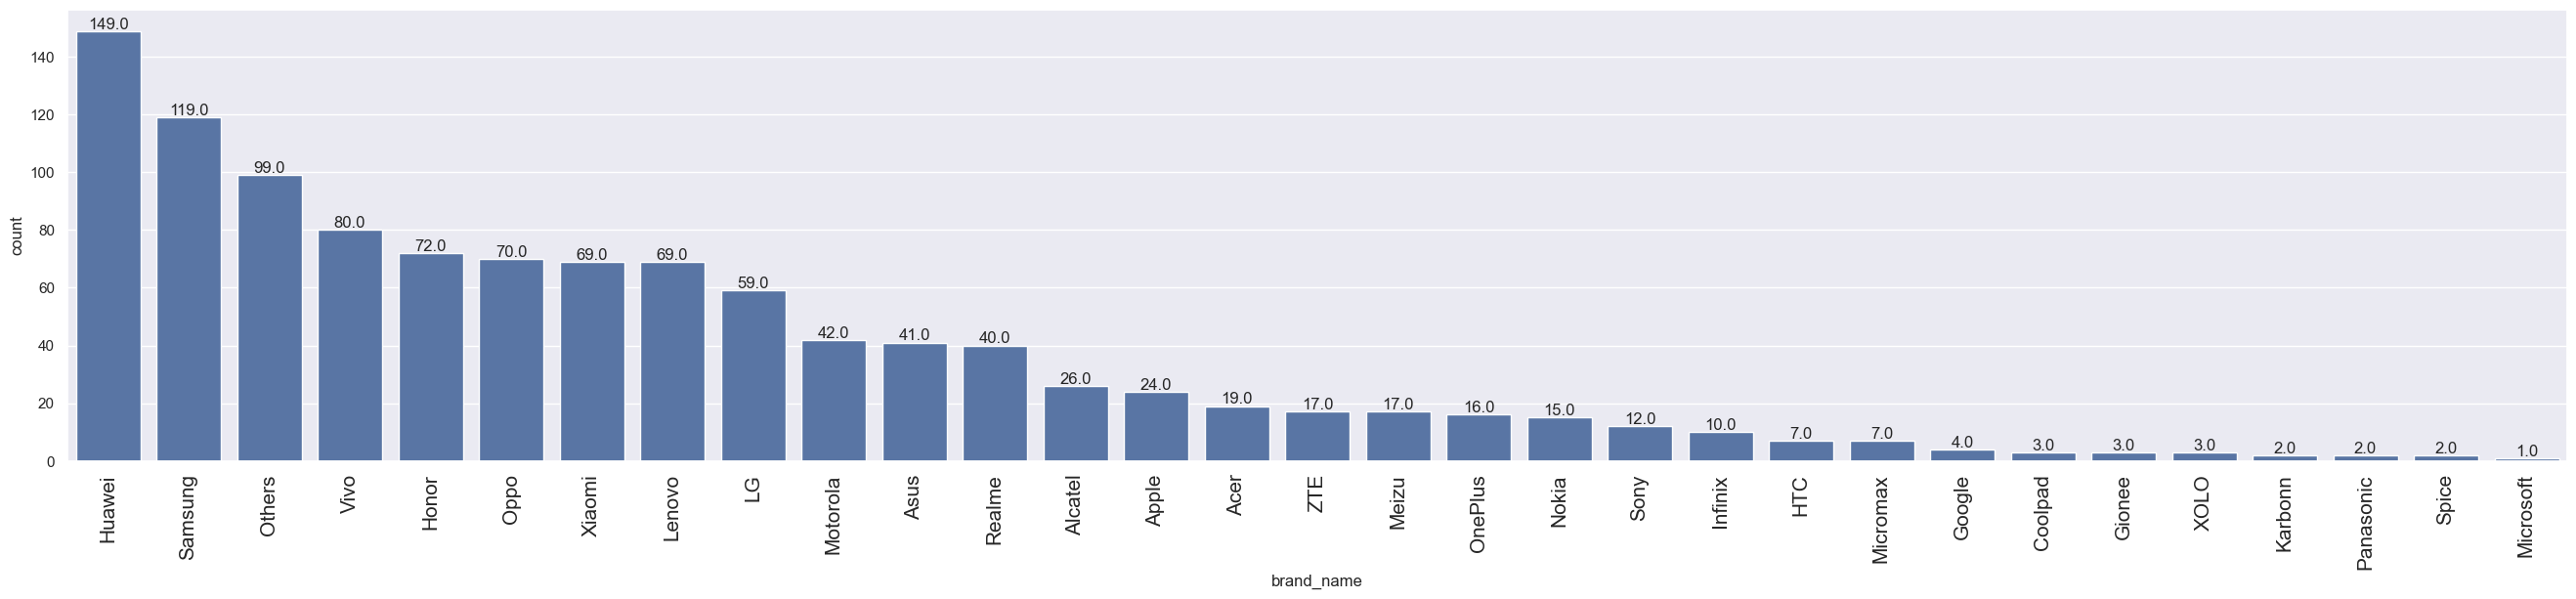

In [83]:
labeled_barplot(df_large_screen, 'brand_name') 

The above bar chat indicates that Huawei, samsung and "others" brand are the most popular ones in products with large screens. 

Everyone likes a good camera to capture their favorite moments with loved ones.
Some customers specifically look for good front cameras to click cool selfies. 
Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.

In [86]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

The shape of the above dataset shows that there are 655 rows and 15 columns. It is often good to know how many rows and columsn we are dealing with in a dataset. It helps us to analyze it with ease. 

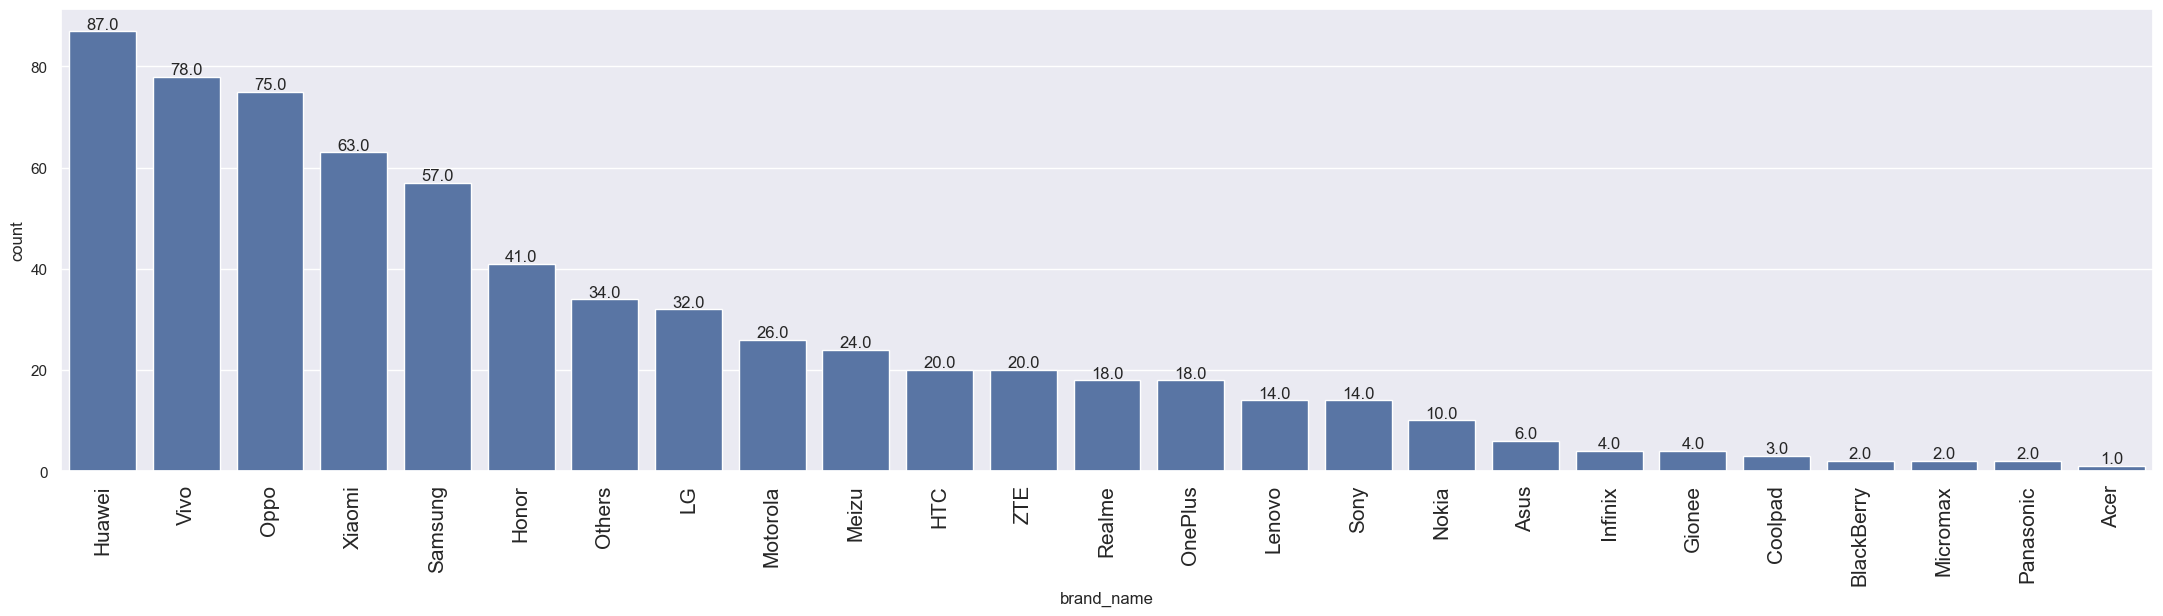

In [88]:
labeled_barplot(df_selfie_camera,'brand_name') 

The above chart implies that Huawei, Vivo and Oppo are the three most popular brands when it comes to products with selfie camera quality of 8 or higher. 

Let's do a similar analysis for rear cameras.

Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [91]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

There are 94 rows and 15 columns of data for cell phones with quality of main camera being greater than 16.

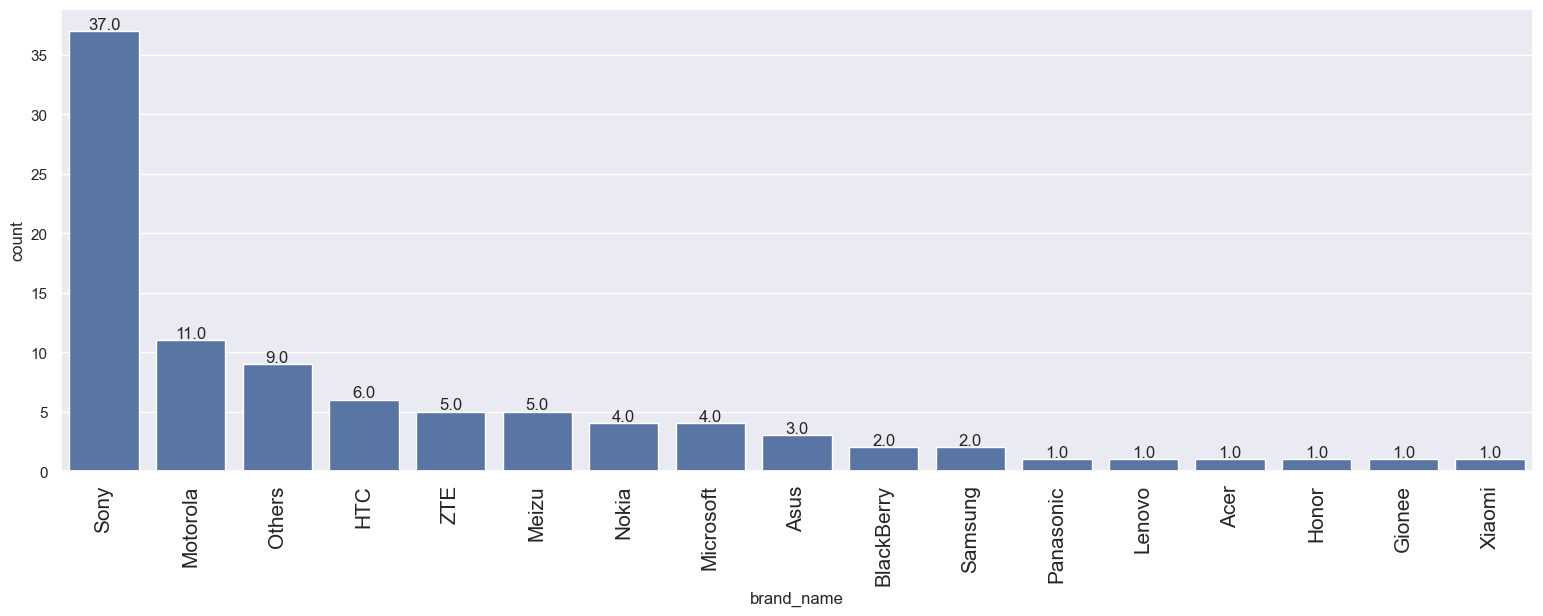

In [93]:
labeled_barplot(df_main_camera, 'brand_name') 

Sony, Motorola and "others" brands seem to be among the most popular items when it comes to the main camera of products. 

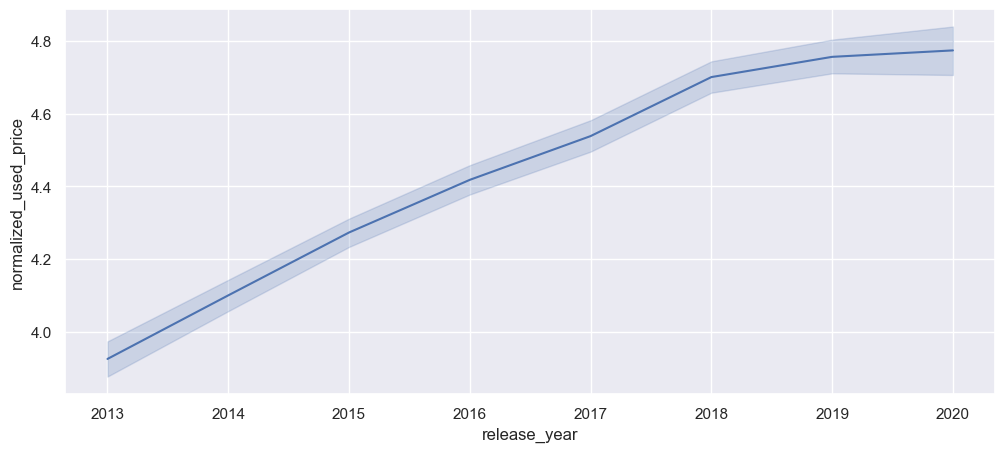

In [95]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='release_year', y='normalized_used_price') 
plt.show()

This line chart indicates that there is constant increase in the price of items from 2013 to 2022 when the price plateaus.

Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.

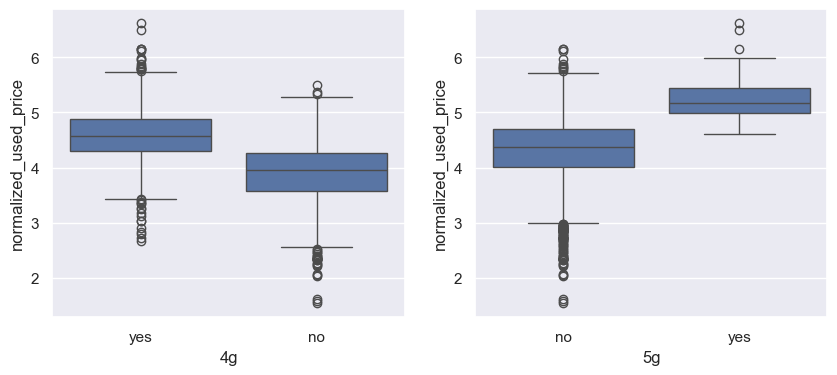

In [98]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

Both box plots show that there are outliers on both ends of the data except with normalized used price devices that do have 5G. They don't have any outliers on the lower end. 
Products with 5g tend to be slightly less than thwo with 4G in quantity. 

Data Preprocessing

## Missing Value Imputation:
We will impute the missing values in the data by the column medians grouped by release_year and brand_name.
Now, we are going to use the copy of the data we earlier created. 

In [159]:
df1 = df.copy()


In [161]:
df1.isnull().sum()
# This line of code shows that the following columns have missing values:
# main_camera_mp           179
# selfie_camera_mp           2
# int_memory                 4
# ram                        4
# battery                    6
# weight                     7

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [163]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year', 'brand_name'])[col].transform("median")
    )   

# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

We will impute the remaining missing values in the data by the column medians grouped by brand_name.

In [166]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) 

# checking for missing values
df1.isnull().sum() 

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

We will fill the remaining missing values in the main_camera_mp column by the column median.

In [168]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median()) 

# checking for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

Feature Engineering

Let's create a new column years_since_release from the release_year column.
We will consider the year of data collection, 2021, as the baseline.
We will drop the release_year column.

In [121]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

# Outlier Check
Let's check for outliers in the data.

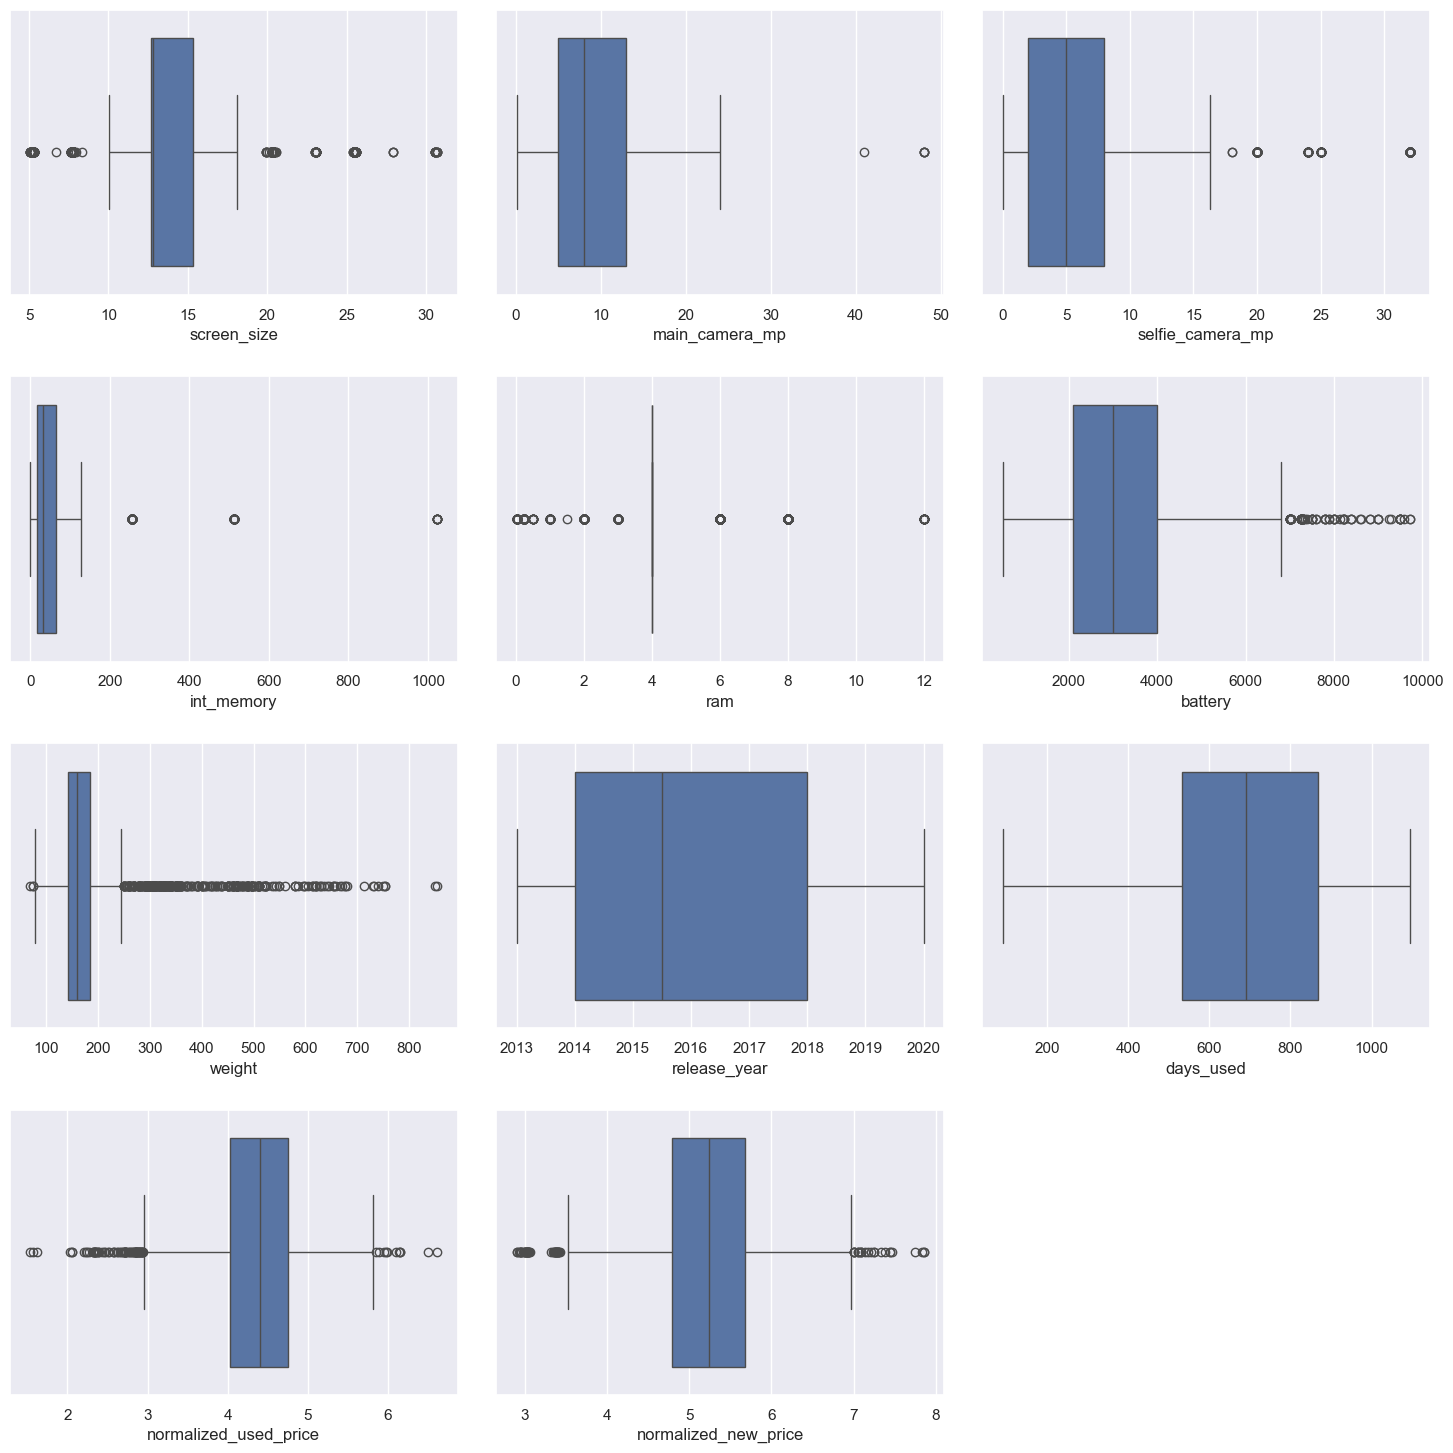

In [177]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

The above box plots show that there is no outliers for years since released as well as days used among products.
And, the median for rams among brands and products is 4. 
Other columns do have a good handful number of outliers though. 

## Data Preparation for modeling
We want to predict the normalized price of used devices.
Before we proceed to build a model, we'll have to encode categorical features.
We'll split the data into train and test to be able to evaluate the model that we build on the train data.
We will build a Linear Regression model using the train data and then check it's performance.

In [181]:
X = df1.drop('normalized_used_price', axis=1)
y = df1['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  
0        127              4.715100  
1        325              5.519018  
2        162              5.884631  
3        345              5.630961  
4  

In [183]:
# let's add the intercept to data
X = sm.add_constant(X)

In [185]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
    dtype=float
)  

X.head()


,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [187]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ## Complete the code to split the data into train and test in specified ratio

In [189]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [191]:
## Creating the OLS model

In [193]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                           20:04:54   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


The OLS shows that there are quite a few columns with P Value greater than 0.05.
We need to drop them one by one to see if dropping them has any impact on the rest of the data.

Model Performance Check
Let's check the performance of the model using different metrics.

We will be using metric functions defined in sklearn for RMSE, MAE, and  R2 .
We will define a function to calculate MAPE and adjusted  R2 .
We will create a function which will print out all the above metrics in one go.

In [195]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# def mape_score(targets, predictions):
#     # Convert targets to Series if it's a DataFrame
#     if isinstance(targets, pd.DataFrame):
#         targets = targets.iloc[:, 0]

#     # Mask where targets are not zero
#     mask = targets != 0

#     # Compute MAPE using the mask
#     return np.mean(np.abs((targets[mask] - predictions[mask]) / targets[mask])) * 100

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [197]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [199]:
#High R-squared as well as Adj. R-squared indicate the model is good. 

In [201]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) 
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


In [203]:
#High R-squared as well as Adj. R-squared indicate the model is good. Both R-squared and its Adj value seem to be very close to each other. 

## Checking Linear Regression Assumptions
We will be checking the following Linear Regression assumptions:

No Multicollinearity

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

TEST FOR MULTICOLLINEARITY
We will test for multicollinearity using VIF.

General Rule of thumb:

If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.




Let's define a function to check VIF.

In [206]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [208]:
checking_vif(x_train) 

,feature,VIF
0,const,3.791593e+06
1,screen_size,7.677290e+00
2,main_camera_mp,2.285051e+00
3,selfie_camera_mp,2.812473e+00
4,int_memory,1.364152e+00
5,ram,2.282352e+00
6,battery,4.081780e+00
7,weight,6.396749e+00
8,release_year,4.899007e+00
9,days_used,2.660269e+00


In [ ]:
# brand_name_Others, brand_name_Samsung, brand_name_Huawei, weight, and screen_size have a VIF higher than 5. 
# VIF higher than 5 indicates there is a high multicollinearity. 
# We need to remove them one by one to see how much of an impact they have in the dataset. 
# Release year also has a VIF very close to 5. We need to find out what it does in the model too. 

Removing Multicollinearity (if needed)

To remove multicollinearity

Drop every column one by one that has a VIF score greater than 5.
Look at the adjusted R-squared and RMSE of all these models.
Drop the variable that makes the least change in adjusted R-squared.
Check the VIF scores again.
Continue till you get all VIF scores under 5.
Let's define a function that will help us do this.

In [210]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [212]:
col_list = ['brand_name_Xiaomi', 'os_iOS', '4g_1', '5g_1'] 

res = treating_multicollinearity(x_train, y_train, col_list) 
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.841795,0.232211
1,4g_1,0.841742,0.232250
2,5g_1,0.841742,0.232250
3,brand_name_Xiaomi,0.841591,0.232361


In [214]:
col_to_drop = 'brand_name_Xiaomi' 
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] 


In [216]:
# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Xiaomi


,feature,VIF
0,const,3.791532e+06
1,screen_size,7.665524e+00
2,main_camera_mp,2.272770e+00
3,selfie_camera_mp,2.806878e+00
4,int_memory,1.361164e+00
5,ram,2.282244e+00
6,battery,4.067173e+00
7,weight,6.396738e+00
8,release_year,4.898701e+00
9,days_used,2.660124e+00


## Dropping high p-value variables
We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
Instead, we will do the following:
Build a model, check the p-values of the variables, and drop the column with the highest p-value.
Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
Repeat the above two steps till there are no columns with p-value > 0.05.
The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [219]:
# initial list of columns
predictors = x_train2.copy()  
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'release_year', 'normalized_new_price', 'brand_name_Samsung', 'brand_name_Sony', '4g_yes']


In [221]:
['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Samsung', 'brand_name_Sony', '4g_yes']



['const',
 'screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'ram',
 'battery',
 'weight',
 'normalized_new_price',
 'years_since_release',
 'brand_name_Samsung',
 'brand_name_Sony',
 '4g_yes']

In [223]:
x_train3 = x_train2[selected_features] 
x_test3 = x_test2[selected_features]  

In [225]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()  ## (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1160.
Date:                   Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                           23:47:52   Log-Likelihood:                 96.990
No. Observations:                   2417   AIC:                            -170.0
Df Residuals:                       2405   BIC:                            -100.5
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# After dropping all columns with VIF>5, it seems the newly created olsmodel2 shows that all P values are less than 0.05 now. 
# This indicates that there is no multicollinearity in the dataset. 

In [227]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train) 
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232453,0.182571,0.841399,0.840608,4.382102


The newly calculated olsmodel2_train_perf shows that both R-squared and Adj.R-squared are the same as each other with a high value which indicates the model is really good. 

In [229]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test) 
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237487,0.182933,0.843628,0.841795,4.466965


TEST FOR LINEARITY AND INDEPENDENCE
We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
If there is no pattern, then we say the model is linear and residuals are independent.
Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [231]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.860482,0.227006
1525,4.448399,4.596070,-0.147670
1128,4.315353,4.290540,0.024812
3003,4.282068,4.220097,0.061971
2907,4.456438,4.479594,-0.023156


###Small Residuals
Most of the residuals are small in magnitude (close to zero), which generally means your model is doing a good job fitting the data.

Positive vs. Negative Residuals

Positive Residuals (e.g., 3026, 1128, 3003) mean the model underestimated the actual value.

Negative Residuals (e.g., 1525, 2907) mean the model overestimated the actual value.

A mix of positive and negative residuals is actually a good sign — it suggests no consistent bias in one direction.

No Obvious Pattern Yet Since we're only seeing 5 data points, it's hard to tell if there's any systematic error (like increasing or decreasing residuals, or clusters of large errors). But from what’s visible:

The residuals fluctuate above and below zero.

They are not increasing or decreasing consistently, which is a good sign — indicating no obvious trend or heteroscedasticity.



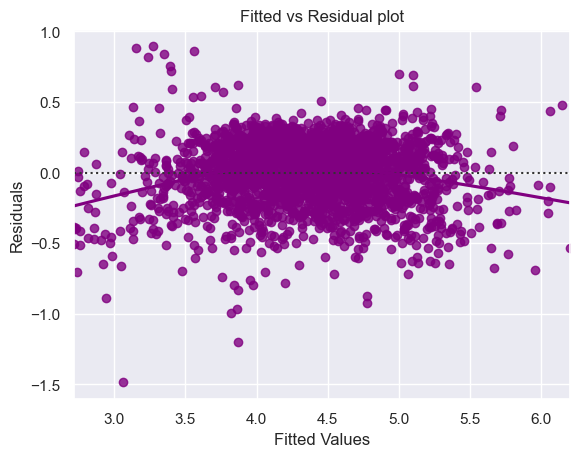

In [180]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

## Interpretation of the residual plot:
The residuals appear mostly centered around zero, which is good.

However, the LOESS line curves downward at both ends.

This suggests a non-linear pattern in the residuals, meaning your model might be missing some non-linear relationships in the data.

There may be slightly more spread at higher fitted values, indicating potential heteroscedasticity (changing variance).



## Take Away:

The current model is okay but not perfect.

Consider:

Adding non-linear terms (e.g., polynomial or interaction terms).

Trying non-linear models (e.g., random forest, gradient boosting).

Transforming variables to improve model fit.

TEST FOR NORMALITY
We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

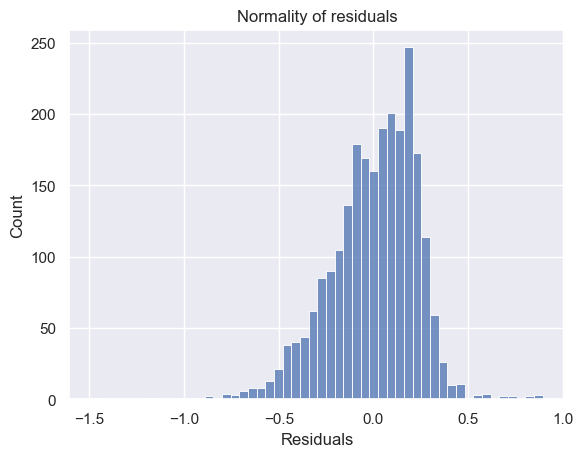

In [234]:
sns.histplot(data=df_pred, x='Residuals')
plt.title("Normality of residuals")
plt.show()

In [236]:
# Outcome: The above histogram indicates there is a bit of normal distribution. However, the chart is slightly left skewed.

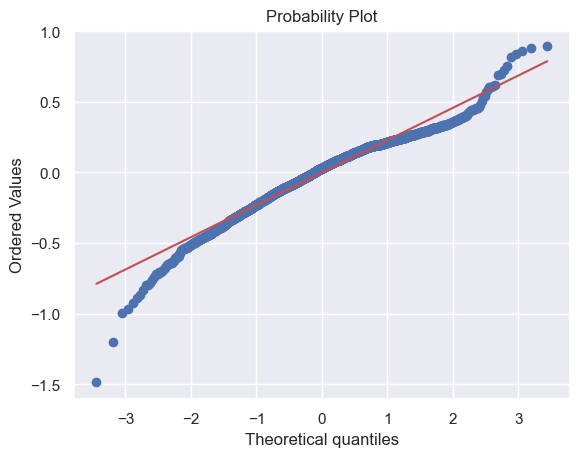

In [240]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred['Residuals'], dist="norm", plot=pylab) 
plt.show()

The middle portion of the data aligns fairly well with the red line, suggesting that the residuals are approximately normally distributed around the center.

However, the tails (both ends) deviate from the line:

On the left side, the points dip below the line.

On the right side, the points rise above the line.

This tail behavior suggests some deviation from normality, particularly in the extreme values (outliers or skewness). While it’s not a severe departure, it indicates that the residuals might have slight heavy tails or mild skew.

In [243]:
stats.shapiro(df_pred['Residuals']) 

ShapiroResult(statistic=0.9683508512826564, pvalue=1.171773340005616e-22)

Since the p-value is much less than 0.05, you reject the null hypothesis of the test.

Conclusion: The residuals do not follow a normal distribution.



TEST FOR HOMOSCEDASTICITY
We will test for homoscedasticity by using the goldfeldquandt test.
If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [245]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"],x_train3) ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.0531442876713093), ('p-value', 0.18530656803312678)]

Since the p-value (0.185) is greater than the common alpha levels (0.05 or 0.01):

✅ Fail to reject the null hypothesis → No significant evidence of heteroscedasticity in the residuals.

✅ Conclusion
The model does not show signs of heteroscedasticity, meaning the assumption of constant error variance is reasonably valid. This is a good sign for the reliability of regression coefficient estimates.

Final Model Summary

In [247]:
olsmodel_final = sm.OLS(y_train, x_train3).fit() 
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1160.
Date:                   Sun, 20 Apr 2025   Prob (F-statistic):               0.00
Time:                           00:44:13   Log-Likelihood:                 96.990
No. Observations:                   2417   AIC:                            -170.0
Df Residuals:                       2405   BIC:                            -100.5
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [196]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train) 
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232453,0.182571,0.841399,0.840608,4.382102


R-squared: 0.841
→ 84.1% of the variance in the used phone price is explained by the model. That’s quite strong.

Adj. R-squared: 0.841
→ Adjusted for the number of predictors. Since it's nearly identical to R², it suggests no unnecessary predictors are bloating the model.

Variables with P > 0.05 are not statistically significant, but in this case, almost all variables are significant.

The model overall is statistically significant, meaning at least one predictor is significantly associated with the target variable.

In [198]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test) 
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237487,0.182933,0.843628,0.841795,4.466965


R-squared: 0.841
→ 84.1% of the variance in the used phone price is explained by the model. That’s quite strong.

Adj. R-squared: 0.841
→ Adjusted for the number of predictors. Since it's nearly identical to R², it suggests no unnecessary predictors are bloating the model.

Variables with P > 0.05 are not statistically significant, but in this case, almost all variables are significant.

The model overall is statistically significant, meaning at least one predictor is significantly associated with the target variable.

### Actionable Insights and Recommendations:

Actionable Insights:

Key Predictors of Used Device Price: The analysis reveals that features like RAM, screen size, battery capacity, internal memory, the presence of 4G/5G, brand, and years since release are significant predictors of the normalized used price of devices. These features should be given priority when pricing used devices.
Brand Influence: Certain brands, such as Apple (iOS), command higher prices in the used market, even after considering other features. This suggests a strong brand preference among consumers, which can be leveraged in pricing strategies.
Depreciation Over Time: As expected, the price of used devices decreases with age (years since release). This depreciation rate can be factored into pricing models to ensure competitive and realistic pricing.
Impact of Features: The presence of desirable features like 4G/5G, larger screen size, higher RAM, and larger battery capacity positively influences the price of used devices. These features can be highlighted to justify higher prices.
Battery and Weight Trade-off: Devices with large batteries tend to be heavier, potentially impacting consumer preferences. This trade-off should be considered when targeting specific customer segments.
Recommendations:

Dynamic Pricing Strategy: Implement a dynamic pricing strategy that incorporates the key features identified by the model, allowing for adjustments based on market demand and individual device characteristics.
Brand Differentiation: Consider adjusting pricing based on brand recognition and consumer preferences, particularly for premium brands like Apple.
Age-Based Pricing: Implement a pricing model that accounts for the depreciation of devices over time. This can involve adjusting prices based on the years since release or using a tiered pricing system for older devices.
Feature-Based Pricing: Develop pricing rules that assign a premium for devices with desirable features, such as 4G/5G connectivity, larger screens, higher RAM, and larger batteries.
Customer Segmentation: Consider segmenting customers based on their preferences for features, such as battery size, screen size, and camera quality. This can help in tailoring pricing strategies and marketing efforts to specific customer groups.
Data Updates: Regularly update the model with new data to ensure its accuracy and responsiveness to market changes.
Transparency and Trust: Communicate pricing strategies clearly to customers, emphasizing the factors that influence the price. This can help build trust and transparency.